<a href="https://colab.research.google.com/github/rocky2203/Machine-learning-/blob/main/Another_copy_of_most_recent_save_of_airline_data_set_11_01_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       AIRLINE SATISFACTION

**Student ID**:    

**Student Name**:  

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [ ]:
# Data and Datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from numpy.polynomial.polynomial import polyfit



# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('data/airline-satisfaction.csv')


# printing out dataset info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 12988 non-null  int64  
 1   gender                             12988 non-null  object 
 2   customer_type                      12988 non-null  object 
 3   age                                12988 non-null  int64  
 4   type_of_travel                     10016 non-null  object 
 5   travel_class                       8466 non-null   object 
 6   flight_distance                    12988 non-null  int64  
 7   inflight_wifi_service              8643 non-null   float64
 8   departure_arrival_time_convenient  12988 non-null  int64  
 9   ease_of_online_booking             12988 non-null  int64  
 10  gate_location                      12988 non-null  int64  
 11  food_and_drink                     12988 non-null  int

,id,gender,customer_type,age,type_of_travel,travel_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class
0,69571,Female,disloyal Customer,30,Business travel,NaN,2586,2.0,2,2,...,NaN,3,3,4,4,2,4,0.0,NaN,neutral
1,19953,Female,Loyal Customer,66,Personal Travel,Eco,315,NaN,4,3,...,NaN,4,3,3,4,4,4,NaN,26.0,neutral
2,8913,Female,disloyal Customer,39,Business travel,Business,510,NaN,5,5,...,4.0,3,5,4,5,4,4,NaN,NaN,satisfied
3,7655,Female,disloyal Customer,21,Business travel,Business,767,4.0,0,4,...,NaN,3,2,5,3,4,4,15.0,NaN,satisfied
4,100573,Female,Loyal Customer,53,Business travel,NaN,486,NaN,1,1,...,NaN,5,5,5,3,5,4,0.0,0.0,satisfied


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [ ]:
df.describe()

,id,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,12988.000000,12988.000000,12988.000000,8643.000000,12988.000000,12988.000000,12988.000000,12988.000000,8105.000000,12988.000000,8621.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.00000,12988.000000,10980.000000,5770.000000
mean,65642.274253,39.512242,1220.268325,2.723360,3.039729,2.740145,2.967662,3.221512,3.248489,3.434786,3.377218,3.381583,3.352864,3.645134,3.298506,3.64729,3.285725,13.968579,14.722357
std,37768.961544,17.384157,1810.431602,1.320076,1.529905,1.395689,1.286436,1.332227,1.342116,1.316823,1.395023,1.291468,1.328352,1.169326,1.265413,1.16820,1.312868,38.024640,37.801154
min,15.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,32866.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,0.000000,0.000000
50%,66051.500000,40.000000,852.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,0.000000,0.000000
75%,98810.000000,51.000000,1771.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,11.000000,12.000000
max,129865.000000,999.000000,172888.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,44.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,1017.000000,823.000000


In [ ]:
df.duplicated().value_counts()

False    12988
dtype: int64

<Axes: >

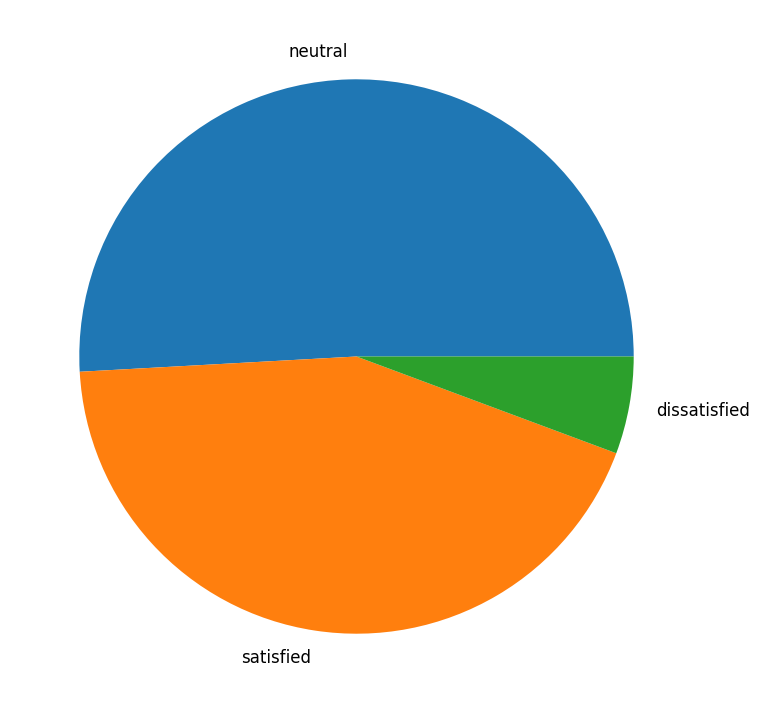

In [ ]:
plt.figure()
df['class'].value_counts().plot(kind="pie", ylabel="")

<Axes: >

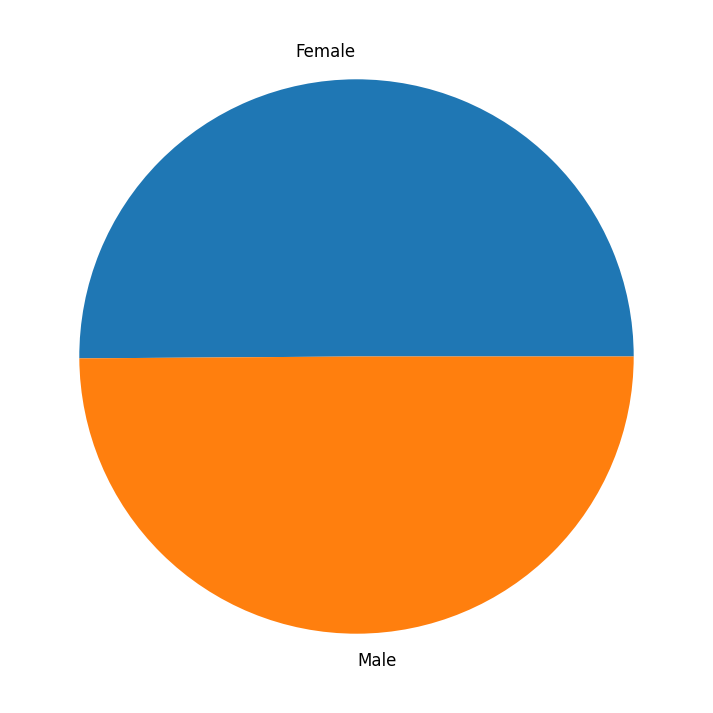

In [ ]:
plt.figure()
df['gender'].value_counts().plot(kind="pie", ylabel="")

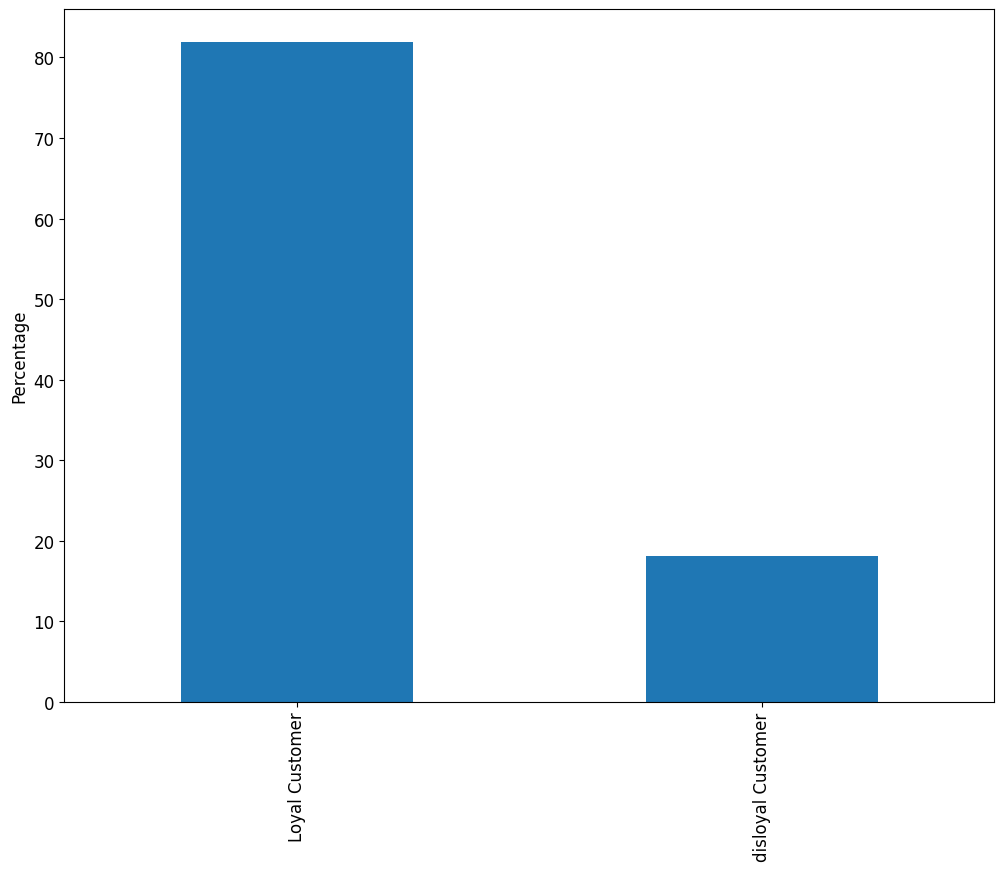

In [ ]:
#statisfaction_loyalty =
customer_count = df["customer_type"].value_counts() / len(df["customer_type"]) * 100
customer_count.plot(kind="bar", ylabel='Percentage')
plt.show()

In [ ]:
df.isnull().sum()


id                                      0
gender                                  0
customer_type                           0
age                                     0
type_of_travel                       2972
travel_class                         4522
flight_distance                         0
inflight_wifi_service                4345
departure_arrival_time_convenient       0
ease_of_online_booking                  0
gate_location                           0
food_and_drink                          0
online_boarding                      4883
seat_comfort                            0
inflight_entertainment               4367
on_board_service                        0
leg_room_service                        0
baggage_handling                        0
checkin_service                         0
inflight_service                        0
cleanliness                             0
departure_delay_in_minutes           2008
arrival_delay_in_minutes             7218
class                             

In [ ]:
df.isnull().head()


,id,gender,customer_type,age,type_of_travel,travel_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class
0,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
remove_df = df
remove_df["arrival_delay_in_minutes"].fillna(0, inplace=True)
remove_df["departure_delay_in_minutes"].fillna(0, inplace=True)


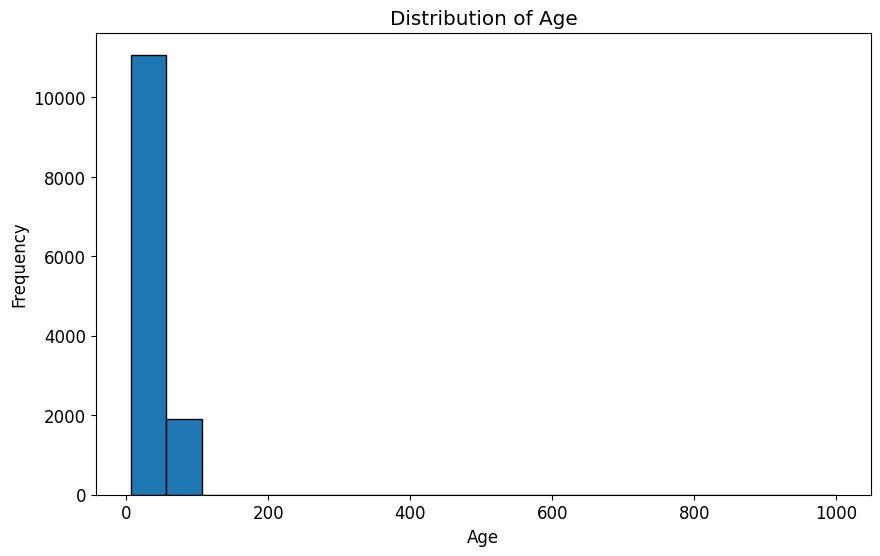

In [ ]:
remove_df['age'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
remove_df = remove_df.dropna()
remove_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 14 to 12980
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1803 non-null   int64  
 1   gender                             1803 non-null   object 
 2   customer_type                      1803 non-null   object 
 3   age                                1803 non-null   int64  
 4   type_of_travel                     1803 non-null   object 
 5   travel_class                       1803 non-null   object 
 6   flight_distance                    1803 non-null   int64  
 7   inflight_wifi_service              1803 non-null   float64
 8   departure_arrival_time_convenient  1803 non-null   int64  
 9   ease_of_online_booking             1803 non-null   int64  
 10  gate_location                      1803 non-null   int64  
 11  food_and_drink                     1803 non-null   int

In [ ]:
remove_df.isnull().sum()


id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
travel_class                         0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
class                                0
dtype: int64

In [ ]:
remove_df = remove_df.drop("gender", axis =1)

In [ ]:
remove_df = remove_df.drop('customer_type', axis =1)

In [ ]:
remove_df = remove_df.drop('type_of_travel', axis =1)

In [ ]:
remove_df = remove_df.drop('travel_class', axis =1)

In [ ]:
remove_df["arrival_delay_in_minutes"].sum(0)


11367.0

In [ ]:
remove_df = remove_df.fillna(remove_df.mean())

<ipython-input-89-d482ce8bc842>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  remove_df = remove_df.fillna(remove_df.mean())


In [ ]:
X = remove_df.drop(['class','id'], axis=1)
y = remove_df['class']

In [ ]:
model = DecisionTreeClassifier()
model.fit(X,y)
features_imp = model.feature_importances_
for feature, importance in zip(X.columns, features_imp):
  print(f'{feature}:{importance}')

age:0.0984902757047636
flight_distance:0.07102925609378866
inflight_wifi_service:0.15411756606226182
departure_arrival_time_convenient:0.03003765989309644
ease_of_online_booking:0.024857896948359794
gate_location:0.02446035020158944
food_and_drink:0.015274990014782927
online_boarding:0.29075648388134434
seat_comfort:0.004332447641167446
inflight_entertainment:0.05261667127804276
on_board_service:0.02905568208253231
leg_room_service:0.04485904399981633
baggage_handling:0.02924945283292888
checkin_service:0.03589145202691095
inflight_service:0.030411576177841678
cleanliness:0.01885507500990377
departure_delay_in_minutes:0.029590532029474453
arrival_delay_in_minutes:0.016113588121394472


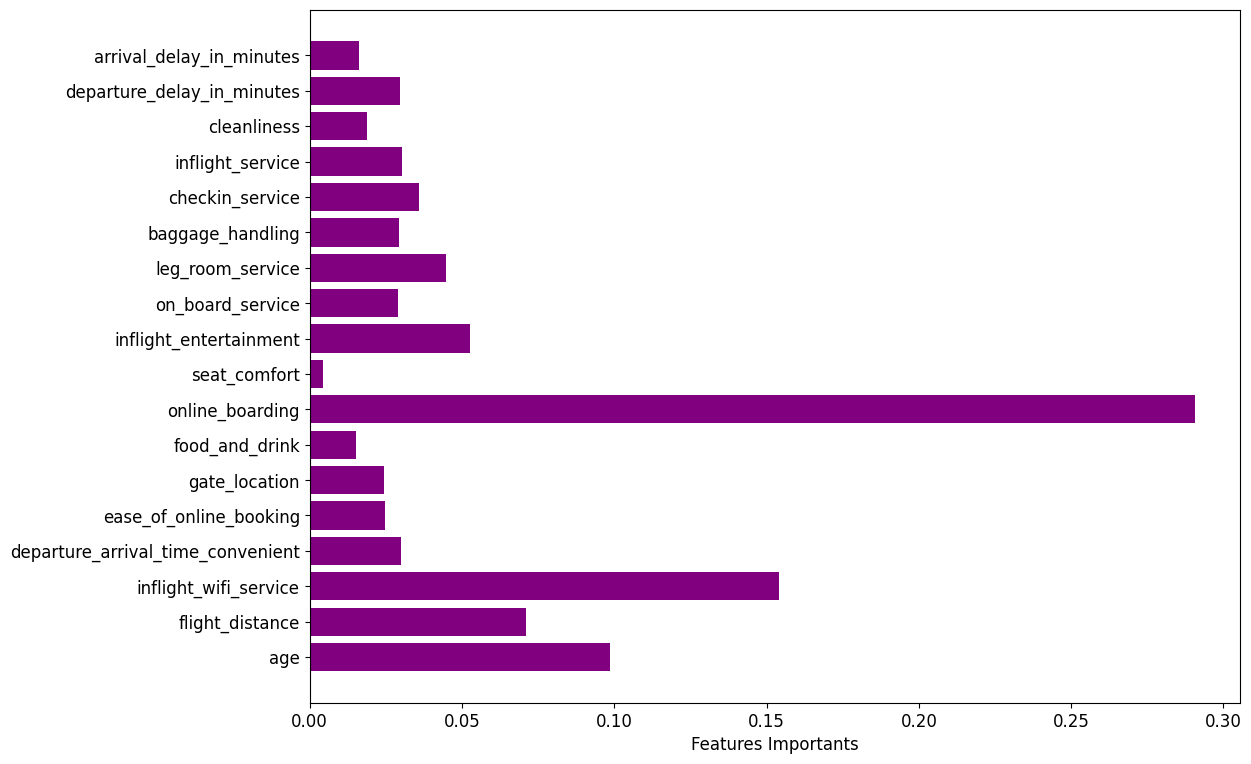

In [ ]:
purple_color = 'purple'
#(OpenAI) Chat Gpt was used to assist the chnage of the colour of this graph
# Plot the horizontal bar chart with purple color
plt.barh(X.columns, features_imp, color=purple_color)
plt.xlabel("Features Importants")
plt.show()

In [ ]:
from sklearn import metrics

def print_stats(n_clusters, n_noise, X, y, y_pred):
    print('Estimated number of clusters: %d' % n_clusters)
    print('Estimated number of noise points: %d' % n_noise)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))



In [ ]:

def plot_cluster_graph(X, y_pred, core_samples_mask, algorithm_name, n_clusters, cluster_centres=None):
    plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 9)}) # set font and plot size to be larger
    unique_labels = set(y_pred)
    colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [1, 1, 1, 1] # white for noise
        class_member_mask = (y_pred == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    if cluster_centres is not None:
        plt.plot(cluster_centres[:,0], cluster_centres[:,1], 'o', mew=10, ms=20, alpha=0.5)

    plt.title('%s with %d clusters' % (algorithm_name, n_clusters))
    plt.show()

In [ ]:
remove_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 14 to 12980
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1803 non-null   int64  
 1   age                                1803 non-null   int64  
 2   flight_distance                    1803 non-null   int64  
 3   inflight_wifi_service              1803 non-null   float64
 4   departure_arrival_time_convenient  1803 non-null   int64  
 5   ease_of_online_booking             1803 non-null   int64  
 6   gate_location                      1803 non-null   int64  
 7   food_and_drink                     1803 non-null   int64  
 8   online_boarding                    1803 non-null   float64
 9   seat_comfort                       1803 non-null   int64  
 10  inflight_entertainment             1803 non-null   float64
 11  on_board_service                   1803 non-null   int

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


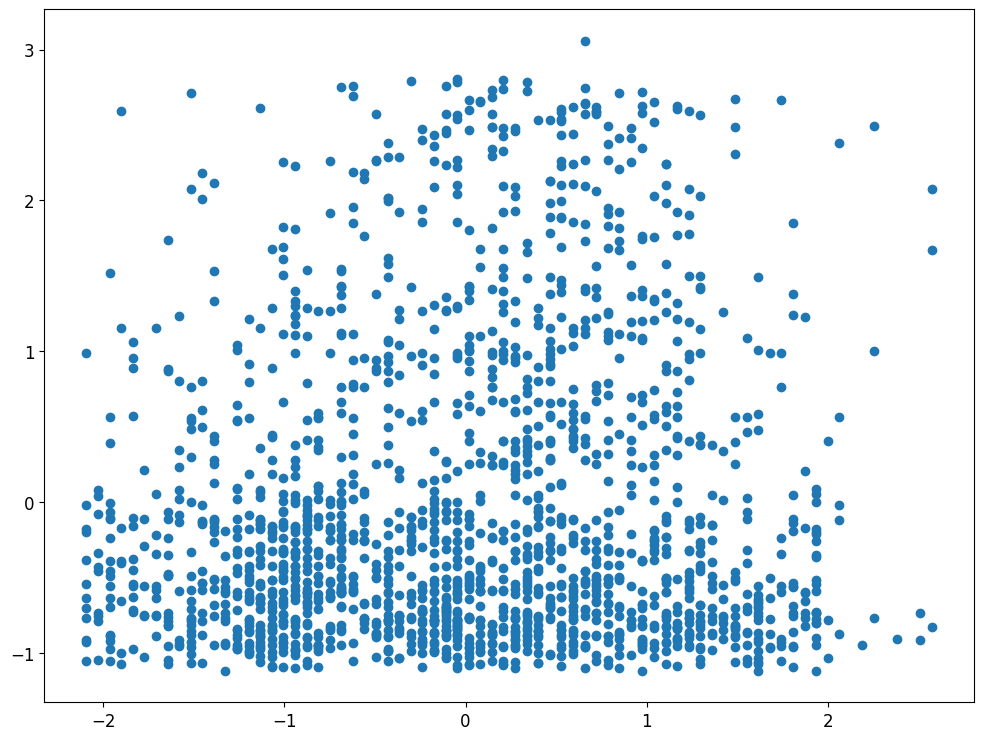

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

Estimated number of clusters: 24
Estimated number of noise points: 1288
Homogeneity: 0.156
Completeness: 0.134


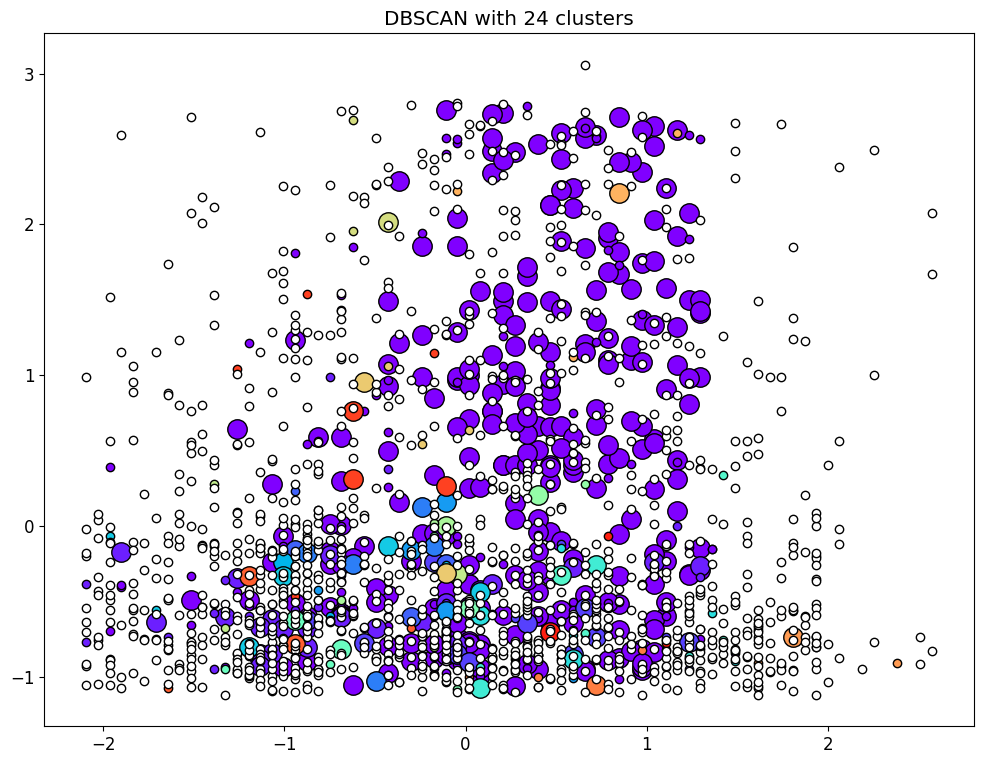

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=2, min_samples=4)
model = model.fit(X)
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

print_stats(n_clusters_, n_noise_, X, y, labels)
plot_cluster_graph(X, labels, core_samples_mask, 'DBSCAN', n_clusters_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Estimated number of clusters: 5
Estimated number of noise points: 0
Homogeneity: 0.205
Completeness: 0.115


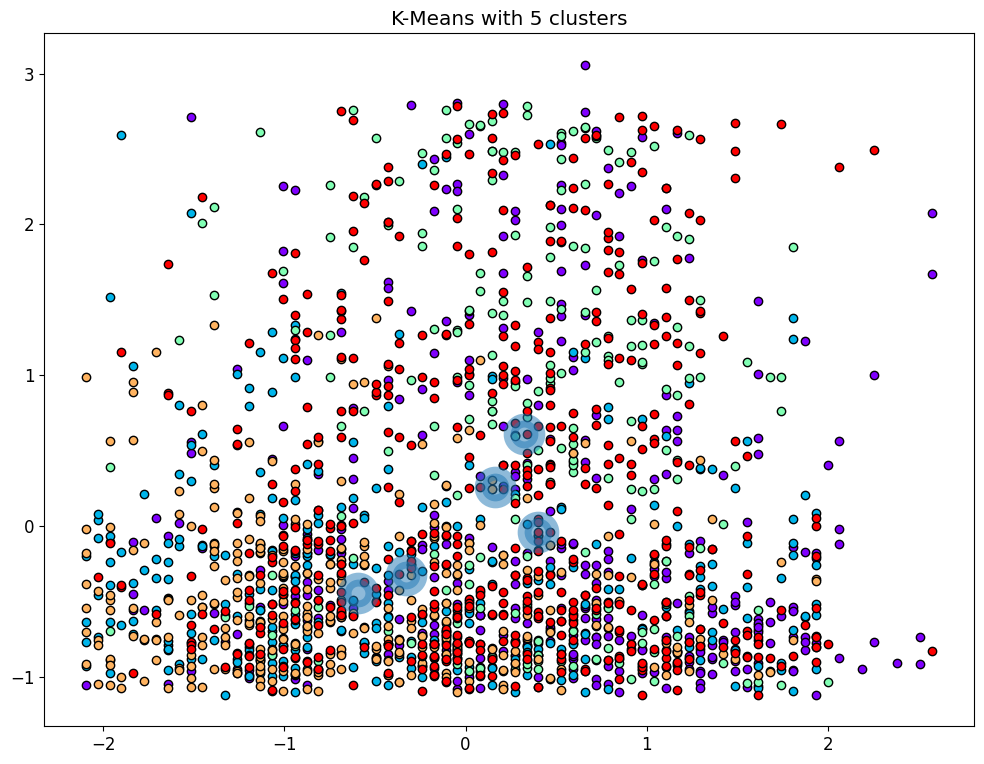

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model = model.fit(X)
labels = model.labels_
cluster_centres = model.cluster_centers_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
core_samples_mask = np.zeros_like(labels, dtype=bool)



print_stats(n_clusters_, n_noise_, X, y, labels)
plot_cluster_graph(X, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

In [ ]:
remove_df = remove_df.drop("id", axis =1)

In [ ]:
remove_df['NOISY']=False

print("Noisy instances / rows")
for i in range(labels.size):
  if labels[i] == -1:
    print("\t",i)
    remove_df.at[i, "NOISY"] = True
remove_df.iloc[115:135].head(30)

Noisy instances / rows


,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class,NOISY
735,52,1504,2.0,2,2,2,2,4.0,5,3.0,3,3,3,5,3,3,0.0,0.0,satisfied,False
741,39,311,4.0,4,4,4,1,4.0,1,1.0,3,2,4,4,5,1,0.0,0.0,satisfied,False
744,43,421,4.0,3,3,3,4,4.0,4,4.0,5,5,5,5,4,4,42.0,0.0,satisfied,False
746,35,247,3.0,5,3,4,1,3.0,1,1.0,4,2,4,4,4,1,0.0,0.0,neutral,False
751,29,2558,4.0,4,4,4,4,4.0,4,4.0,4,2,5,5,5,4,10.0,0.0,satisfied,False
756,29,1250,5.0,1,1,1,5,5.0,5,5.0,5,1,4,1,2,5,72.0,89.0,satisfied,False
767,39,985,4.0,5,4,2,5,4.0,2,5.0,5,3,5,3,4,5,0.0,0.0,dissatisfied,False
770,53,484,3.0,0,3,5,3,5.0,4,4.0,4,3,4,5,4,4,0.0,0.0,neutral,False
777,26,612,1.0,4,1,1,4,1.0,2,4.0,3,5,4,3,1,4,0.0,0.0,neutral,False
791,60,731,5.0,5,5,5,2,4.0,4,3.0,3,4,3,4,3,5,0.0,0.0,satisfied,False


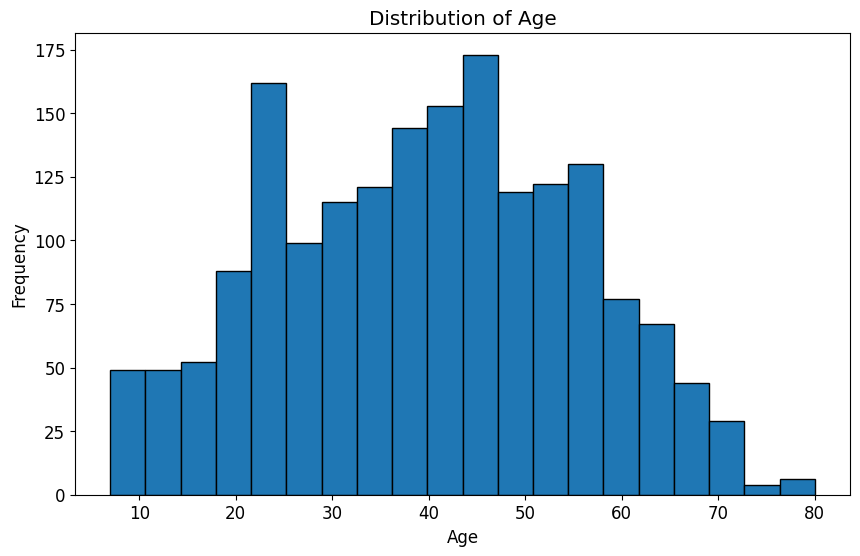

In [ ]:
remove_df['age'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Cm')

<Figure size 1200x900 with 0 Axes>

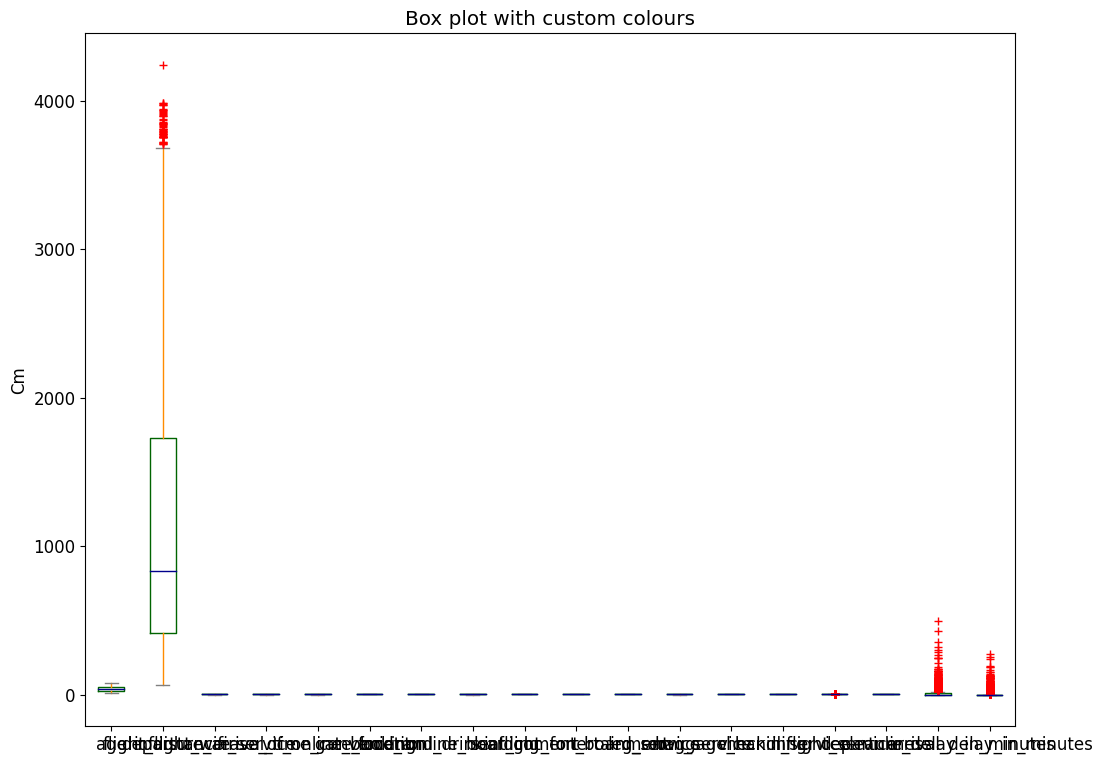

In [ ]:
plt.figure();
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
box_plot = remove_df.plot.box(color=color, sym='r+');
box_plot.set_title('Box plot with custom colours')
box_plot.set_ylabel('Cm')

In [ ]:
remove_df = remove_df.drop("NOISY", axis =1)

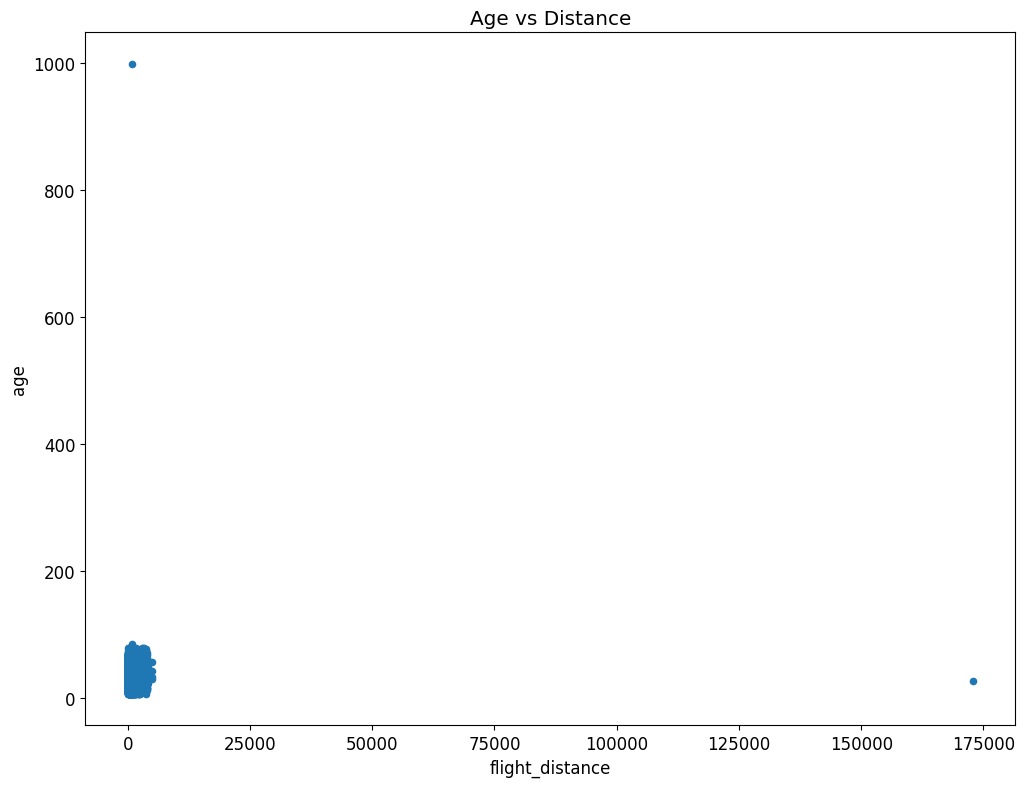

In [ ]:
df.plot(kind='scatter', x='flight_distance', y='age', title='Age vs Distance');


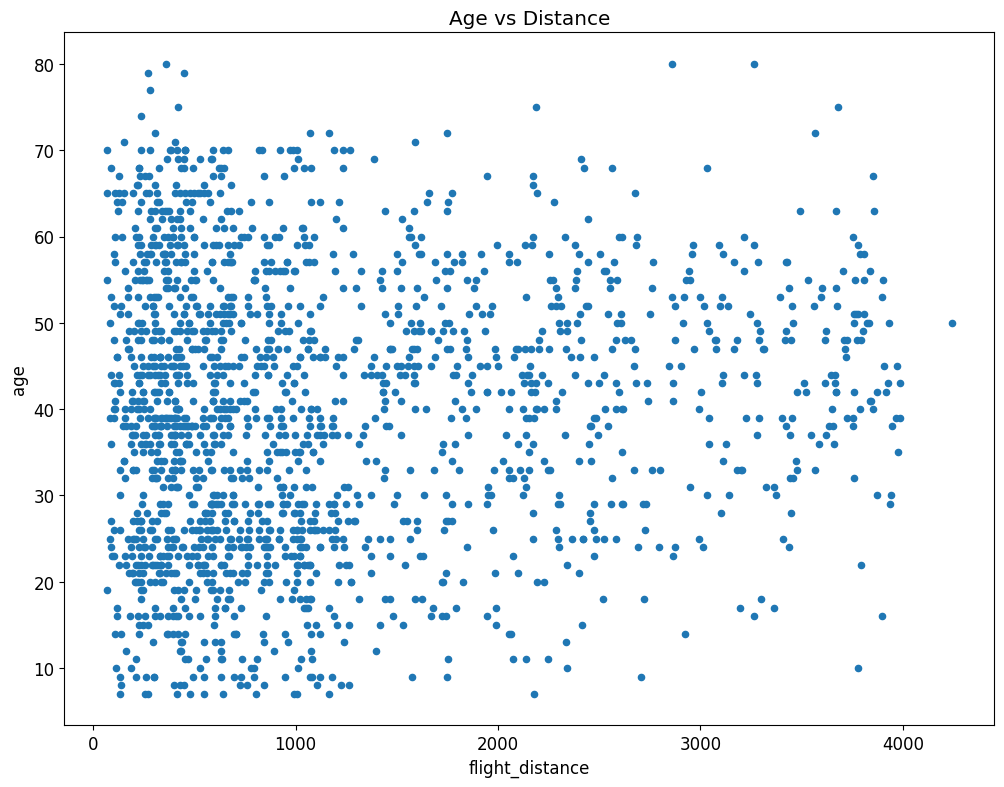

In [ ]:

remove_df.plot(kind='scatter', x='flight_distance', y='age', title='Age vs Distance');


<Axes: title={'center': 'Departure delay in minutes'}, ylabel='Frequency'>

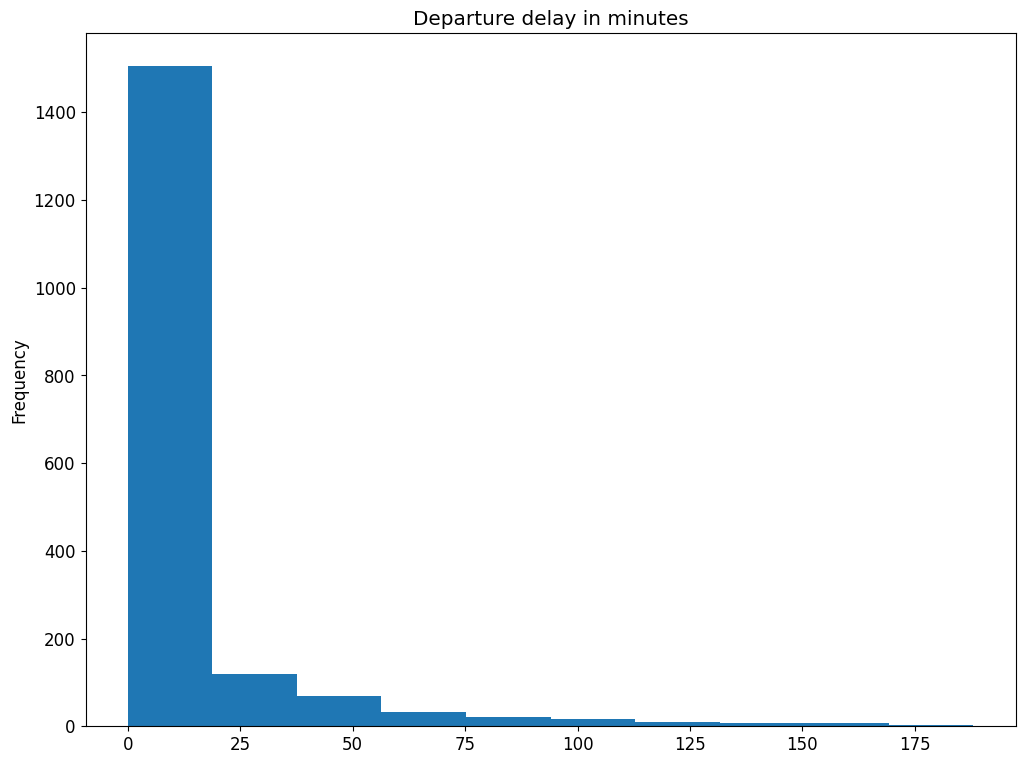

In [ ]:
df_dep_delay = remove_df.loc[df["departure_delay_in_minutes"]<200]
df_dep_delay['departure_delay_in_minutes'].plot(kind = "hist", title="Departure delay in minutes")

class
dissatisfied    Axes(0.125,0.11;0.775x0.77)
neutral         Axes(0.125,0.11;0.775x0.77)
satisfied       Axes(0.125,0.11;0.775x0.77)
Name: flight_distance, dtype: object

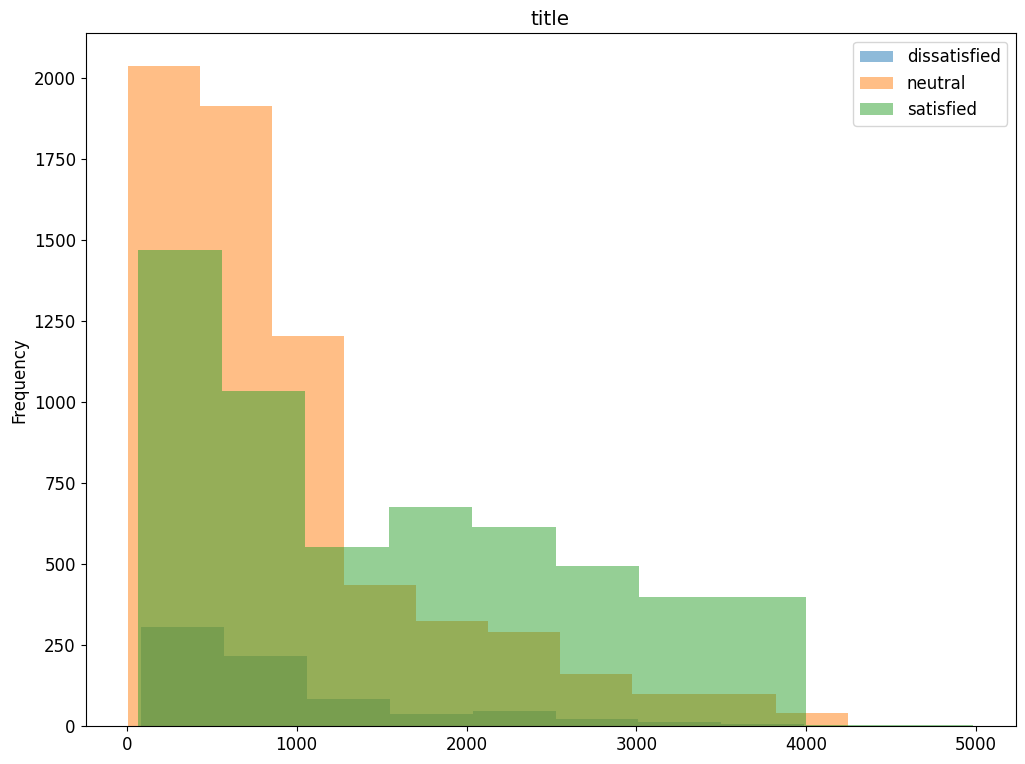

In [ ]:
df_color_hist= df.loc[df["flight_distance"]<10000]
df_color_hist.groupby("class")['flight_distance'].plot(kind="hist", alpha=0.5, title="title", legend = True)

In [ ]:
remove_df.corr()

<ipython-input-109-17fde0b0b66d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  remove_df.corr()


,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
age,1.000000,0.090195,0.010945,0.062999,0.025103,0.028266,-0.025095,0.173104,0.097412,0.015760,0.052771,0.037153,-0.075423,0.007775,-0.073742,-0.015000,-0.032195,-0.011537
flight_distance,0.090195,1.000000,0.014774,-0.002311,0.079816,0.025939,0.032408,0.198655,0.151708,0.133934,0.107842,0.114433,0.079581,0.024638,0.074684,0.071595,0.012543,-0.012922
inflight_wifi_service,0.010945,0.014774,1.000000,0.298527,0.708730,0.332235,0.110233,0.455166,0.084862,0.204863,0.149881,0.190253,0.138321,0.020927,0.136826,0.094753,0.000610,-0.022832
departure_arrival_time_convenient,0.062999,-0.002311,0.298527,1.000000,0.416380,0.444293,-0.048328,0.060437,-0.004586,-0.040863,0.065770,0.022354,0.094215,0.082430,0.091839,-0.029243,-0.005425,0.001834
ease_of_online_booking,0.025103,0.079816,0.708730,0.416380,1.000000,0.464835,-0.004224,0.415745,0.009392,0.038694,0.070734,0.118024,0.052211,-0.013538,0.046317,-0.013857,0.009368,-0.021182
gate_location,0.028266,0.025939,0.332235,0.444293,0.464835,1.000000,-0.004466,0.030480,0.051806,0.017070,-0.017725,0.007847,0.032736,-0.042276,0.028139,0.016442,-0.029015,0.004023
food_and_drink,-0.025095,0.032408,0.110233,-0.048328,-0.004224,-0.004466,1.000000,0.175524,0.566482,0.662169,0.079282,0.071663,0.063033,0.062227,0.078177,0.665871,-0.032287,-0.016734
online_boarding,0.173104,0.198655,0.455166,0.060437,0.415745,0.030480,0.175524,1.000000,0.378525,0.247663,0.152944,0.102694,0.070373,0.168917,0.069943,0.293897,-0.001950,-0.016385
seat_comfort,0.097412,0.151708,0.084862,-0.004586,0.009392,0.051806,0.566482,0.378525,1.000000,0.621505,0.145046,0.143425,0.077839,0.140363,0.087891,0.678397,-0.015477,-0.011724
inflight_entertainment,0.015760,0.133934,0.204863,-0.040863,0.038694,0.017070,0.662169,0.247663,0.621505,1.000000,0.398460,0.320611,0.384185,0.081823,0.420887,0.700371,-0.030035,0.020367


<ipython-input-110-666fa9a3179a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = remove_df.corr(method="spearman")


<Axes: >

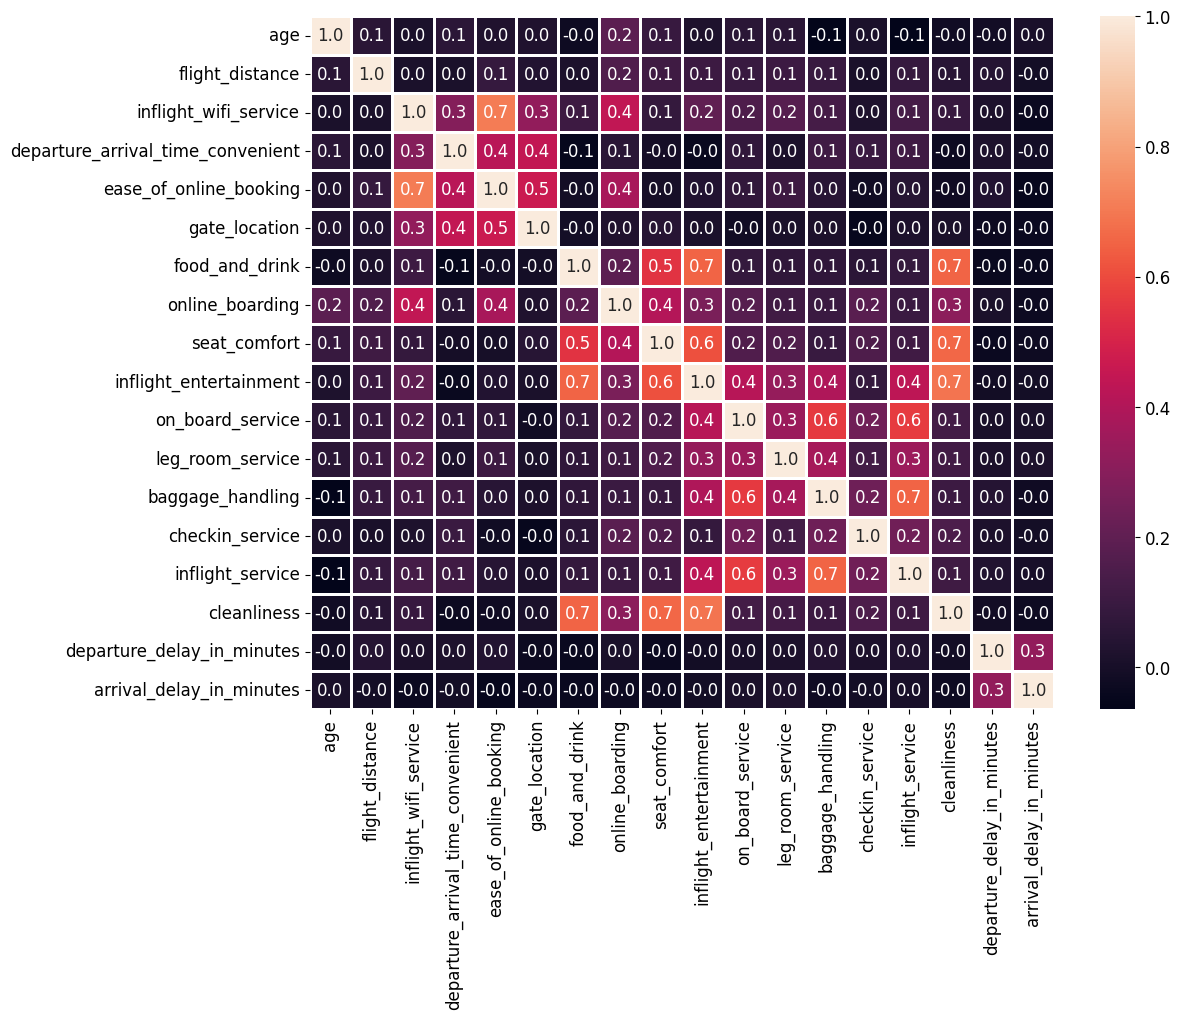

In [ ]:

carr = remove_df.describe()
corr = remove_df.corr(method="spearman")
sns.heatmap(data=corr, annot=True, linewidths=.8, fmt= '.1f')#plt.show()"""

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [ ]:
def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):
    mse_list = np.array([])
    mae_list = np.array([])
    me_list = np.array([])
    start_time = time()
    if output:
        print("Starting model validation")
    for x in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list = np.append(mse_list, mean_squared_error(y_test, y_pred))
        mae_list = np.append(mae_list, mean_absolute_error(y_test, y_pred))
        me_list = np.append(me_list, max_error(y_test, y_pred))
    end_time = time()
    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))
    return mse_list, mae_list, me_list

In [ ]:
result_df = pd.DataFrame(columns=['Model','MSE','MAE','ME'])

def add_result(model_name, mse_list, mae_list, me_list):
    global result_df
    new_row = {'Model':model_name, 'MSE':mse_list.mean(), 'MAE':mae_list.mean(), 'ME':me_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])
    return result_df

def print_results(mse_list, mae_list, me_list):
    print("MSE:  %0.2f (+/- %0.2f)" % (mse_list.mean(), mse_list.std() * 2))
    print("MAE:  %0.2f (+/- %0.2f)" % (mae_list.mean(), mae_list.std() * 2))
    print("ME:   %0.2f (+/- %0.2f)" % (me_list.mean(), me_list.std() * 2))


In [ ]:
# Utility function to report best scores
def report(results, rank_metric='score', n_top=3):
    print("\nModels ranked according to", rank_metric)
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_" + rank_metric] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f} (+/- {1:.2f})".format(
                  results["mean_test_" + rank_metric][candidate],
                  results["std_test_" + rank_metric][candidate]*2))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
num_runs = 100

In [ ]:
flight_data_df = remove_df

In [ ]:
flight_data_df.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,39.726567,1185.177482,2.707709,3.028841,2.698835,2.917915,3.206323,3.199113,3.417637,3.359956,3.346644,3.298392,3.631725,3.268441,3.621742,3.281753,12.233500,6.304493
std,15.634565,1000.276998,1.313078,1.526405,1.372285,1.251381,1.337010,1.345341,1.325185,1.332049,1.293359,1.308952,1.185246,1.261589,1.166501,1.313481,34.655853,21.833771
min,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,417.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,834.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1726.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,8.000000,0.000000
max,80.000000,4243.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,496.000000,276.000000


## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
flight_data_df = flight_data_df.dropna()
cat_columns = flight_data_df.select_dtypes(['object']).columns
flight_data_df[cat_columns] = flight_data_df[cat_columns].apply(lambda x: x.astype('category'))
flight_data_df[cat_columns] = flight_data_df[cat_columns].apply(lambda x: x.cat.codes)
X = flight_data_df.iloc[:,:len(flight_data_df.columns)-1]
y = flight_data_df.iloc[:,len(flight_data_df.columns)-1]
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 69.25207756232687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
"""# Instantiating model
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# Hold-out-validation
accuracy_list_knn_sklearn = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_knn_sklearn = np.append(accuracy_list_knn_sklearn, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_sklearn.mean(), accuracy_list_knn_sklearn.std() * 2))"""

'# Instantiating model\nk = 10\nmodel = KNeighborsClassifier(n_neighbors=k)\n\n# Hold-out-validation\naccuracy_list_knn_sklearn = np.array([])\n\nfor x in range(100):\n    # Hold-out validation - 80% training and 20% testing\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)\n\n    # Training and testing the model\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n\n    # Appending performance metrics to the accuracy array created above\n    accuracy_list_knn_sklearn = np.append(accuracy_list_knn_sklearn, accuracy_score(y_test, y_pred))\n\nprint("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_sklearn.mean(), accuracy_list_knn_sklearn.std() * 2))'

In [ ]:
"""# Instantiating model
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# 5-fold cross validation
# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)
scores = cross_validate(model, X, y, cv=5, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))"""

'# Instantiating model\nk = 10\nmodel = KNeighborsClassifier(n_neighbors=k)\n\n# 5-fold cross validation\n# StratifiedKFold is used when cv is set to None or an Integer (with a classification model)\nscores = cross_validate(model, X, y, cv=5, return_train_score=True, return_estimator=True)\n\n# Printing results\nprint("Accuracy (Training): %0.2f (+/- %0.2f)" % (scores[\'train_score\'].mean(), scores[\'train_score\'].std() * 2))\nprint("Accuracy (Testing):  %0.2f (+/- %0.2f)" % (scores[\'test_score\'].mean(), scores[\'test_score\'].std() * 2))'

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

scores = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

Accuracy:  0.58 (+/- 0.03)
Precision: 0.38 (+/- 0.02)
Recall:    0.41 (+/- 0.02)


In [ ]:
"""# Instantiating model
model = KNeighborsClassifier(n_neighbors=10)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Appending performance metrics to arrays created above
# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))"""

'# Instantiating model\nmodel = KNeighborsClassifier(n_neighbors=10)\n\n# Hold-out validation - default 80% training and 20% testing\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)\n\n# Training the model\nmodel.fit(X_train, y_train)\n\n# Testing the model\ny_pred = model.predict(X_test)\n\n# Appending performance metrics to arrays created above\n# Printing out confusion matrix and accuracy\nprint(metrics.confusion_matrix(y_test, y_pred))\nprint("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))'

In [ ]:
model = DecisionTreeClassifier(max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[  0  14   3]
 [  0 161  24]
 [  0  39 120]]

Accuracy (Testing):  0.78 


In [ ]:
"""# Instantiating model
model = RandomForestClassifier(n_estimators=20)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Appending performance metrics to arrays created above
# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))"""

'# Instantiating model\nmodel = RandomForestClassifier(n_estimators=20)\n\n# Hold-out validation - default 80% training and 20% testing\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)\n\n# Training the model\nmodel.fit(X_train, y_train)\n\n# Testing the model\ny_pred = model.predict(X_test)\n\n# Appending performance metrics to arrays created above\n# Printing out confusion matrix and accuracy\nprint(metrics.confusion_matrix(y_test, y_pred))\nprint("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))'

In [ ]:
"""# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# cross-validation of the model
scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))"""

'# Instantiating model\nmodel = KNeighborsClassifier(n_neighbors=3)\n\n# defining multiple metrics for scoring\nscoring = {\n    \'accuracy\': make_scorer(accuracy_score),\n    \'prec_macro\': make_scorer(precision_score, average=\'macro\', zero_division=0),\n    \'rec_macro\': make_scorer(recall_score, average=\'macro\', zero_division=0)\n}\n\n# cross-validation of the model\nscores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)\n\n# Printing results\nprint("Accuracy:  %0.2f (+/- %0.2f)" % (scores[\'test_accuracy\'].mean(), scores[\'test_accuracy\'].std() * 2))\nprint("Precision: %0.2f (+/- %0.2f)" % (scores[\'test_prec_macro\'].mean(), scores[\'test_prec_macro\'].std() * 2))\nprint("Recall:    %0.2f (+/- %0.2f)" % (scores[\'test_rec_macro\'].mean(), scores[\'test_rec_macro\'].std() * 2))'

In [ ]:
# Instantiating model
"""model = DecisionTreeClassifier()

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# cross-validation of the model
scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))"""

'model = DecisionTreeClassifier()\n\n# defining multiple metrics for scoring\nscoring = {\n    \'accuracy\': make_scorer(accuracy_score),\n    \'prec_macro\': make_scorer(precision_score, average=\'macro\', zero_division=0),\n    \'rec_macro\': make_scorer(recall_score, average=\'macro\', zero_division=0)\n}\n\n# cross-validation of the model\nscores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)\n\n# Printing results\nprint("Accuracy:  %0.2f (+/- %0.2f)" % (scores[\'test_accuracy\'].mean(), scores[\'test_accuracy\'].std() * 2))\nprint("Precision: %0.2f (+/- %0.2f)" % (scores[\'test_prec_macro\'].mean(), scores[\'test_prec_macro\'].std() * 2))\nprint("Recall:    %0.2f (+/- %0.2f)" % (scores[\'test_rec_macro\'].mean(), scores[\'test_rec_macro\'].std() * 2))'

In [ ]:
model = RandomForestClassifier(n_estimators=20)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

Accuracy:  0.85 (+/- 0.02)
Precision: 0.61 (+/- 0.21)
Recall:    0.61 (+/- 0.03)


In [ ]:
def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):

    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])

    start_time = time()

    if output:
        print("Starting model validation")
    for x in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))
    end_time = time()

    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))

    return acc_list, prec_list, rec_list

In [ ]:
result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

def add_result(model_name, acc_list, prec_list, rec_list):

    global result_df # doing this to be able to access the gloval dataframe defined above the function

    new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])

    return result_df

def print_results(acc_list, prec_list, rec_list):

    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

def clear_results():

    global result_df
    result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

In [ ]:
# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('K-NN', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

Starting model validation
Completed 100 validation runs in 3.10 seconds

ACC:   0.54 (+/- 0.05)
PREC:  0.41 (+/- 0.05)
REC:   0.41 (+/- 0.05)


In [ ]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)
add_result('DT', acc_list, prec_list, rec_list)
print_results(acc_list, prec_list, rec_list)

Starting model validation


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Completed 100 validation runs in 1.50 seconds

ACC:   0.80 (+/- 0.04)
PREC:  0.55 (+/- 0.05)
REC:   0.57 (+/- 0.03)


In [ ]:
model = RandomForestClassifier(n_estimators=20)
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)
add_result('RF', acc_list, prec_list, rec_list)
print_results(acc_list, prec_list, rec_list)

Starting model validation


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Completed 100 validation runs in 7.75 seconds

ACC:   0.84 (+/- 0.03)
PREC:  0.59 (+/- 0.14)
REC:   0.60 (+/- 0.02)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = LogisticRegression(max_iter=5000)
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)
add_result('LR', acc_list, prec_list, rec_list)
print_results(acc_list, prec_list, rec_list)

Starting model validation


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

Completed 100 validation runs in 201.25 seconds

ACC:   0.77 (+/- 0.04)
PREC:  0.51 (+/- 0.03)
REC:   0.55 (+/- 0.02)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

Model,Accuracy,Precision,Recall
RF,0.844349,0.589498,0.604573
DT,0.803463,0.546471,0.570535
LR,0.768393,0.514709,0.547708
K-NN,0.541025,0.414107,0.413336


In [ ]:
models = {}
models["K-NN"] = KNeighborsClassifier(n_neighbors=3)
models["DT"] = DecisionTreeClassifier(max_depth=4, criterion='entropy')
models["RF"] = RandomForestClassifier(n_estimators=20)
models["LR"] = LogisticRegression(max_iter=5000)
clear_results()

for name, model in models.items():
    acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs, output=False)
    add_result(name, acc_list, prec_list, rec_list)
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
models = {}
models["K-NN"] = KNeighborsClassifier(n_neighbors=3)
models["DT"] = DecisionTreeClassifier(max_depth=4, criterion='entropy')
models["RF"] = RandomForestClassifier(n_estimators=20)
models["LR"] = LogisticRegression(max_iter=5000)
clear_results()
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)
    add_result(name, scores['test_accuracy'], scores['test_prec_macro'], scores['test_rec_macro'])
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

In [ ]:
#sets hyper parameter
model = DecisionTreeClassifier()
param_dict = {"max_depth": [2, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"]}
print("> STARTING RANDOM SEARCH ...")
n_iter_search = 200
n_folds = 10

random_search = RandomizedSearchCV(model, param_distributions=param_dict,
n_iter=n_iter_search, cv=n_folds)
start_time = time()
random_search.fit(X, y)
end_time = time()


print("> RANDOM SEARCH COMPLETE")

print("\nRandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((end_time - start_time), n_iter_search))
report(random_search.cv_results_)

In [ ]:
model = DecisionTreeClassifier()
param_grid = {"max_depth": [2, 4, 6, 8, None],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 6, 8, 10],
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"]}

print("\n> STARTING GRID SEARCH ...")
grid_search = GridSearchCV(model, param_grid=param_grid, cv=n_folds)

start_time = time()
grid_search.fit(X, y)
end_time = time()

print("> GRID SEARCH COMPLETE")

print("\nGridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (end_time - start_time, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


> STARTING GRID SEARCH ...
> GRID SEARCH COMPLETE

GridSearchCV took 29.38 seconds for 500 candidate parameter settings.

Models ranked according to score
Model with rank: 1
Mean validation score: 0.82 (+/- 0.04)
Params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_split': 10, 'splitter': 'best'}

Model with rank: 2
Mean validation score: 0.81 (+/- 0.04)
Params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 10, 'min_samples_split': 8, 'splitter': 'best'}

Model with rank: 3
Mean validation score: 0.81 (+/- 0.04)
Params: {'criterion': 'gini', 'max_depth': 6, 'max_features': 10, 'min_samples_split': 4, 'splitter': 'best'}



## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [ ]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
acc_list_dt, prec_list_dt, rec_list_dt = validate_model(X, y, model, num_runs)
print_results(acc_list_dt, prec_list_dt, rec_list_dt)

Starting model validation


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Completed 100 validation runs in 1.12 seconds

ACC:   0.80 (+/- 0.04)
PREC:  0.54 (+/- 0.03)
REC:   0.57 (+/- 0.02)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
model = RandomForestClassifier(n_estimators=20)
acc_list_rf, prec_list_rf, rec_list_rf = validate_model(X, y, model, num_runs)
print_results(acc_list_rf, prec_list_rf, rec_list_rf)

Starting model validation


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Completed 100 validation runs in 7.52 seconds

ACC:   0.84 (+/- 0.04)
PREC:  0.59 (+/- 0.13)
REC:   0.60 (+/- 0.02)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


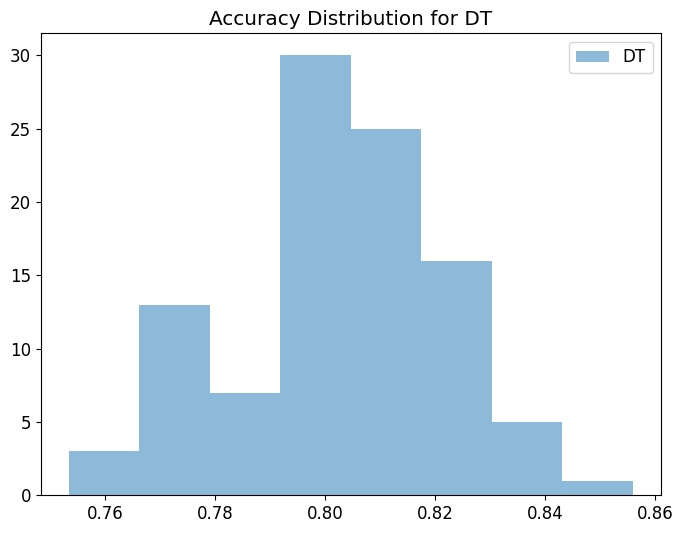

In [ ]:
num_bins = 8
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(acc_list_dt, num_bins, alpha=0.5, label='DT')
ax.set_title('Accuracy Distribution for DT')
ax.legend()
plt.show()


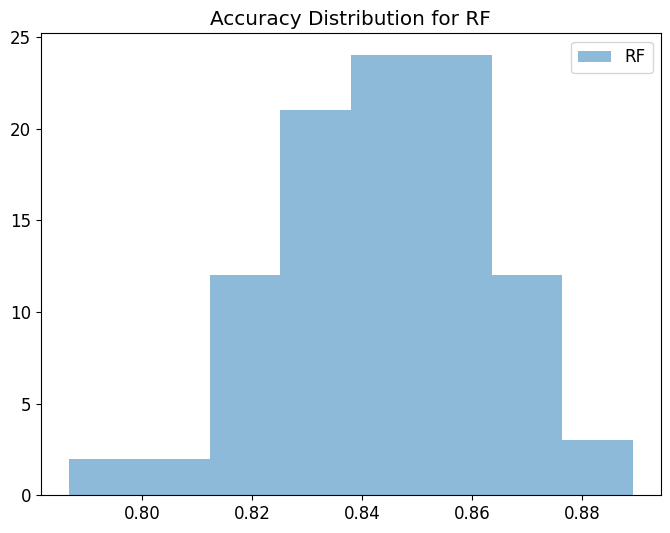

In [ ]:
num_bins = 8

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(acc_list_rf, num_bins, alpha=0.5, label='RF')

ax.set_title('Accuracy Distribution for RF')
ax.legend()

plt.show()

In [ ]:

alpha = 0.05

print("DT normality tests")
stat, p = shapiro(acc_list_dt)
print(' - Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

stat, p = normaltest(acc_list_dt)
print(' - D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

print("\nRF normality tests")
stat, p = shapiro(acc_list_rf)
print(' - Shapiro:    W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")

stat, p = normaltest(acc_list_rf)
print(' - D’Agostino: W = %0.2f, p-value = %0.2f' % (stat, p))
if p < alpha:
    print("   - The distribution does NOT appear to be normal")
else:
    print("   - The appears to be normal")


DT normality tests
 - Shapiro:    W = 0.99, p-value = 0.43
   - The appears to be normal
 - D’Agostino: W = 0.46, p-value = 0.80
   - The appears to be normal

RF normality tests
 - Shapiro:    W = 0.99, p-value = 0.67
   - The appears to be normal
 - D’Agostino: W = 1.62, p-value = 0.44
   - The appears to be normal


In [ ]:

alpha = 0.05
stat, p = ttest_ind(acc_list_dt, acc_list_rf)
print('T-Test')
print(' - stat = %0.2f, p-value = %f' % (stat, p))
if p < alpha:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

stat, p = mannwhitneyu(acc_list_dt, acc_list_rf)
print('\nMann-Whitney U [for other continuous distributions]')
print(' - stat = %0.2f, p-value = %f' % (stat, p))
if p < alpha:
    print(" - The performance difference appears significant")
else:
    print(" - The performance difference is NOT significant")

T-Test
 - stat = -14.74, p-value = 0.000000
 - The performance difference appears significant

Mann-Whitney U [for other continuous distributions]
 - stat = 705.50, p-value = 0.000000
 - The performance difference appears significant


In [ ]:
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

Model,Accuracy,Precision,Recall
RF,0.847462,0.571871,0.605625
DT,0.806452,0.545774,0.572855
LR,0.770393,0.516572,0.548562
K-NN,0.554604,0.425420,0.425149
